## Homework2

In [194]:
# Подключение модулей.
from datetime import timedelta
import matplotlib.pyplot
import sklearn
import pandas
%matplotlib inline

In [195]:
# Считываем полученные ранее данные.
dataset = pandas.read_csv('data/weatherAUS.csv')

In [196]:
# Разбиваем на обучающую и тестовую выборки.
numpy.random.seed(7)
random_subset = numpy.random.choice(
    numpy.arange(dataset.shape[0]), size=7500, replace=False)
dataset = dataset.iloc[random_subset]
X = dataset.drop(['RainTomorrow'], axis=1)
y = dataset['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=9)
N_test, _ = X_test.shape

In [197]:
# Обучаем классификатор
mlp_model = MLPClassifier(hidden_layer_sizes=(50,),
                          solver='adam',
                          activation='relu',
                          random_state=3,
                          max_iter=1000)

In [198]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 26.7 s


MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=3)

In [199]:
# Проверяем качество классификатора
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [200]:
# Точность на обучающей и тестовой выборке
print("Точность на обучающей выборке = {:.2f} %, точность на тестовой выборке = {:.2f} %".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

Точность на обучающей выборке = 99.71 %, точность на тестовой выборке = 81.26 %


Видно переобучение.

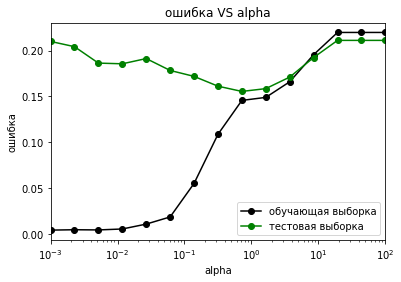

In [201]:
# Подбор оптимального значения параметра регуляризации alpha
alpha_arr = numpy.logspace(-3, 2, 15)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(50,),
                              solver='adam', activation='relu', max_iter=1000, random_state=9)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(numpy.mean(y_train != y_train_pred))
    test_err.append(numpy.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
matplotlib.pyplot.semilogx(alpha_arr, train_err, 'k-o', label='обучающая выборка')
matplotlib.pyplot.semilogx(alpha_arr, test_err, 'g-o', label='тестовая выборка')
matplotlib.pyplot.xlim([numpy.min(alpha_arr), numpy.max(alpha_arr)])
matplotlib.pyplot.title('ошибка VS alpha')
matplotlib.pyplot.xlabel('alpha')
matplotlib.pyplot.ylabel('ошибка')
matplotlib.pyplot.legend()

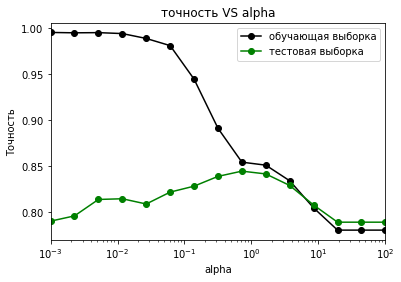

In [202]:
matplotlib.pyplot.semilogx(alpha_arr, train_acc, 'k-o', label='обучающая выборка')
matplotlib.pyplot.semilogx(alpha_arr, test_acc, 'g-o', label='тестовая выборка')
matplotlib.pyplot.xlim([numpy.min(alpha_arr), numpy.max(alpha_arr)])
matplotlib.pyplot.title('точность VS alpha')
matplotlib.pyplot.xlabel('alpha')
matplotlib.pyplot.ylabel('Точность')
matplotlib.pyplot.legend()

Когда ~ alpha < 1 видно переобучение.
Когда alpha_opt, то точность на тествой и на обучающей выборке совпадает.
Когда увеличивается alpha дальше alpha_opt видно недообучение.

In [203]:
min_train_err = numpy.min(train_err)
min_test_err = numpy.min(test_err)
print("Минимальное значение ошибки:")
print("На обучающей выборке = ", min_train_err)
print("На тестовой выборке = ", min_test_err)

Минимальное значение ошибки:
На обучающей выборке =  0.0043076923076923075
На тестовой выборке =  0.15542857142857142


In [204]:
alpha_opt = alpha_arr[test_err == min_test_err]
print("Оптимальное значение alpha = ", alpha_opt)

Оптимальное значение alpha =  [0.71968567]


In [205]:
# Классификатор при найденном оптимальном значении alpha.
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(50,),
                          solver='adam', activation='relu', random_state=7)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [206]:
print("Точность на обучающей выборке = {:.2f} %, точность на тестовой выборке = {:.2f} %".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

Точность на обучающей выборке = 85.60 %, точность на тестовой выборке = 84.42 %


In [207]:
# Матрица рассогласования.
print(confusion_matrix(y_test_pred, y_test))

[[1968  306]
 [ 103  248]]


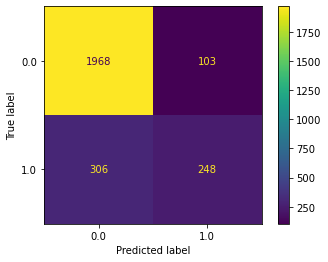

In [208]:
predictions = mlp_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_, )
disp.plot()
matplotlib.pyplot.show()

In [209]:
# Подбор числа нейронов.
neuron_count_array = numpy.linspace(10, 300, 30).astype(int)
test_error = []
train_error = []
test_acc = []
train_acc = []

for neuron_count in neuron_count_array:
    model = MLPClassifier(
        alpha=alpha_opt,
        hidden_layer_sizes=(neuron_count,),
        solver='adam',
        activation='relu',
        max_iter=1000,
        random_state=7
    )
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    test_error.append(numpy.mean(y_test != y_test_pred))
    train_error.append(numpy.mean(y_train != y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))

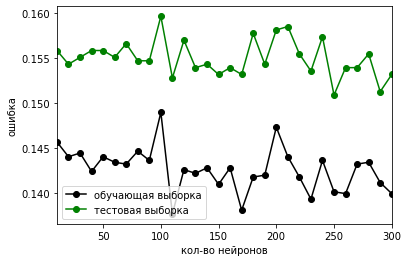

In [210]:
matplotlib.pyplot.plot(neuron_count_array, train_error, 'k-o', label='обучающая выборка')
matplotlib.pyplot.plot(neuron_count_array, test_error, 'g-o', label='тестовая выборка')
matplotlib.pyplot.xlim([numpy.min(neuron_count_array), numpy.max(neuron_count_array)])
matplotlib.pyplot.xlabel('кол-во нейронов')
matplotlib.pyplot.ylabel('ошибка')
matplotlib.pyplot.legend()

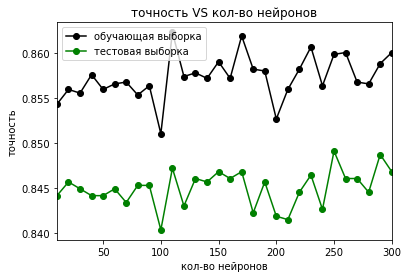

In [211]:
matplotlib.pyplot.plot(neuron_count_array, train_acc, 'k-o', label='обучающая выборка')
matplotlib.pyplot.plot(neuron_count_array, test_acc, 'g-o', label='тестовая выборка')
matplotlib.pyplot.xlim([numpy.min(neuron_count_array), numpy.max(neuron_count_array)])
matplotlib.pyplot.title('точность VS кол-во нейронов')
matplotlib.pyplot.xlabel('кол-во нейронов')
matplotlib.pyplot.ylabel('точность')
matplotlib.pyplot.legend()

In [212]:
min_test_error = numpy.min(test_error)
neuron_opt = neuron_count_array[test_error == min_test_error][0]
print('Оптимальное кол-во нейронов = {}'.format(neuron_opt))

Оптимальное кол-во нейронов = 250


Наилучшая точность на тестовой выборке при кол-ве нейронов = 250, оптимальном кол-ве, при том что зависимости между количеством нейронов и точностью не видно.

In [213]:
# Классификатор при найденном оптимальном значении числа нейронов.
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(neuron_opt,),
                          solver='adam', activation='relu', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [214]:
print("Точность на обучающей выборке = {:.2f} %, точность на тестовой выборке = {:.2f} %".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

Точность на обучающей выборке = 85.66 %, точность на тестовой выборке = 84.61 %


Когда используем оптимальные значения параметра регуляризации и числа нейронов переобучения нет.

In [215]:
# Подбор оптимального значения параметра регуляризации и числа нейронов.
neuron_arr = numpy.linspace(10, 300, 5).astype(int)
alpha_arr = numpy.logspace(-3, 2, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []
neuron_alpha_opt = []

for neuron in neuron_arr:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(neuron,),
                                  solver='adam', activation='relu', max_iter=1500, random_state=3)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)

        train_err.append(numpy.mean(y_train != y_train_pred))
        test_err.append(numpy.mean(y_test != y_test_pred))
        train_acc.append(accuracy_score(y_train, y_train_pred))
        test_acc.append(accuracy_score(y_test, y_test_pred))
        neuron_alpha_opt.append([neuron, alpha])

In [216]:
min_test_err = numpy.min(test_err)
i, = numpy.where(test_err == min_test_err)
neuron_opt, alpha_opt = neuron_alpha_opt[i[0]]
print("Оптимальное кол-во нейронов = ", neuron_opt)
print("Оптимальна alpha = ", alpha_opt)

Оптимальное кол-во нейронов =  82
Оптимальна alpha =  0.31622776601683794


In [217]:
# Классификатор при найденных оптимальных значениях.
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(neuron_opt,),
                          solver='adam', activation='relu', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [218]:
print("Точность на обучающей выборке = {:.2f} %, точность на тестовой выборке = {:.2f} %".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

Точность на обучающей выборке = 90.48 %, точность на тестовой выборке = 84.69 %


## Выводы:
Обучили на наших данных (полносвязную) неглубокую нейронную сеть.

Построили графики зависимости ошибки на обучающей и тестовой выборках от параметра alpha и кол-во нейронов.
Наблюдали переобучение/недообучение при разных alpha.

Избавились от переобучения засчет подбора оптимального параметра регуляризации.
Повысили точность на тестовой выборке подбором оптимального числа нейронов, а при одновременном подборе оптимальных параметров повысили точность и на обучающей выборке.